# The Autokey Cipher

The autokey variant of the Vigenère cipher is similar to the other tabula recta based ciphers, but allows for the benefits of a very long keyword, which we've seen helps disguise the letter frequencies in a message, while only requiring the user to remember a short keyword.

## Enciphering with Autokey

With the autokey cipher the keyword acts as a __primer__, upon which the rest of the key is built. To build the keystream, you first use the keyword, and then add on the plaintext as the rest of the key. This generates a keystream of sufficient length (longer than needed actually) that only the person enciphering the message would have. The keystream is certainly not random, since it will have all the same characteristics of the English language, but unlike when repeating the same keyword over and over, the plaintext will change the key in a manner that is more unpredictable to an eavesdropper.

For a sample plaintext of `accept the greater challenge` and keyword of `UNICORN`, enciphering would look like:

```
 keystream: UNICORNACCEPTTHEGREATERCH
 plaintext: acceptthegreaterchallenge
ciphertext: UPKGDKGHGIVTTMLVIYELEIEIL
```

## Deciphering with Autokey

Deciphering the message needs to work a little differently than normal, since the person receiving the message doesn't know the plaintext, and therefore can't generate the entire keystream from the start. Instead, they'll need to partially decipher the message using the keyword, and as plaintext is determined add on to the keystream.

```
 keystream: UNICORN
ciphertext: UPKGDKGHGIVTTMLVIYELEIEIL
 plaintext: acc
```
So once you have a few letters, you can add them onto the keystream and decipher a few more.

```
 keystream: UNICORNACC
ciphertext: UPKGDKGHGIVTTMLVIYELEIEIL
 plaintext: accepttheg
```

and keep going until...

```
 keystream: UNICORNACCEPTTHEG
ciphertext: UPKGDKGHGIVTTMLVIYELEIEIL
 plaintext: acceptthegreaterc
```
... you have the entire message.
```
 keystream: UNICORNACCEPTTHEGREATERCH
ciphertext: UPKGDKGHGIVTTMLVIYELEIEIL
 plaintext: acceptthegreaterchallenge
```

## Frequency Analysis of Autokey

Using Pride and Prejudice as the plaintext, and `UNICORN` as the keyword, the frequencies look like:

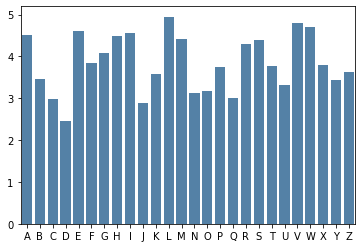

In [2]:
from seaborn import barplot

def vigenereEncipher(text, keyword):
    ciphertext = ''
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = textClean(text)
    keyword = textClean(keyword)

    for i in range(0, len(text)):
        plainnum = LETTERS.find( text[i] )
        keynum = LETTERS.find( keyword[i % len(keyword)] )
        ciphertext += LETTERS[ ( plainnum + keynum) % 26 ]

    return ciphertext

def textClean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

def letterFrequency(text):
    text = textClean(text)
    frequencyList = []
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in LETTERS:
        frequencyList.append( 100 * text.count(char) / len(text))
    
    return frequencyList

with open('pride-and-prejudice.txt', encoding="utf8") as f:
    text = textClean(f.read())

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = letterFrequency( vigenereEncipher( text, 'UNICORNS'+text) )
barplot(labels, values, color='steelblue');

This bar chart illustrates the concealing power of a good polyalphabetic cipher. Every cipertext letter has a frequency between $2.5\%$ and $5\%$. It does not divulge much, if anything, about the original ciphertext message and how it may correspond to the ciphertext message. Cracking the Vigenère and the Autokey variant will need a new approach that moves beyond single letter frequency analysis. 